In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost  import XGBRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold

In [2]:
data = pd.read_csv('Data.csv')


In [3]:
data.head()


,Cutting speed (rpm),Feed rate (mm/min),Radial depth of cut(mm),Tool wear\nTWmax
0,200,100,1.5,0.379
1,200,150,1.5,0.424
2,200,50,1.0,0.360
3,200,100,1.0,0.415
4,200,150,1.0,0.386


In [4]:
data.columns


Index(['Cutting  speed (rpm)', 'Feed rate (mm/min)', 'Radial depth of cut(mm)',
       'Tool wear\nTWmax'],
      dtype='object')

In [5]:
data.isnull().sum()


Cutting  speed (rpm)       0
Feed rate (mm/min)         0
Radial depth of cut(mm)    0
Tool wear\nTWmax           0
dtype: int64

In [6]:
X=data.drop(['Tool wear\nTWmax'], axis=1)


In [7]:
y=data['Tool wear\nTWmax']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 43)

In [9]:
xgbr = XGBRegressor(objective='reg:squarederror')
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
print('Accuracy score on Test data= {:.8f}'.format(xgbr.score(X_test, y_test)))
xgbr_k = XGBRegressor(objective='reg:squarederror')
#cv = RepeatedKFold(n_splits=30, n_repeats=4, random_state=1)
#scores = cross_val_score(xgbr_k, X, y, cv=cv)
#print(scores)

Accuracy score on Test data= 0.96314480


C:\Users\uchih\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [76]:
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(xgbr, X, y, cv=cv, n_jobs=-1)

In [77]:
#scores

array([0.6824128 , 0.59439324, 0.69454069, 0.79545297, 0.73606223,
       0.71711545, 0.76320261, 0.57075667, 0.77466402, 0.73241098,
       0.60728545, 0.74706211, 0.52222418, 0.67479121, 0.72974625,
       0.6332222 , 0.7301772 , 0.74163985, 0.71466894, 0.79141492,
       0.75257562, 0.73698723, 0.68200133, 0.71710501, 0.72595762,
       0.661302  , 0.61172201, 0.64545222, 0.63201118, 0.70911906])

In [11]:
pred=xgbr.predict(X_test)
comparison=pd.DataFrame()
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.7f}".format(rmse))
print("R2: {:.7f}".format(r2))


Testing performance
RMSE: 0.0117426
R2: 0.9631448


C:\Users\uchih\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [138]:
comparison['True Tool wear\nTWmax']=y_test
comparison['Predicted Tool wear\nTWmax']=pred
comparison['Std']=comparison.std(axis=1)

In [139]:
comparison

,True Tool wear\nTWmax,Predicted Tool wear\nTWmax,Std
20,0.299,0.299447,0.000316
2,0.360,0.360739,0.000522
15,0.260,0.260900,0.000637
22,0.409,0.408387,0.000434
57,0.363,0.362651,0.000247
91,0.324,0.323931,0.000049
69,0.260,0.260900,0.000637
55,0.221,0.222440,0.001018
11,0.343,0.342577,0.000299
79,0.360,0.360739,0.000522


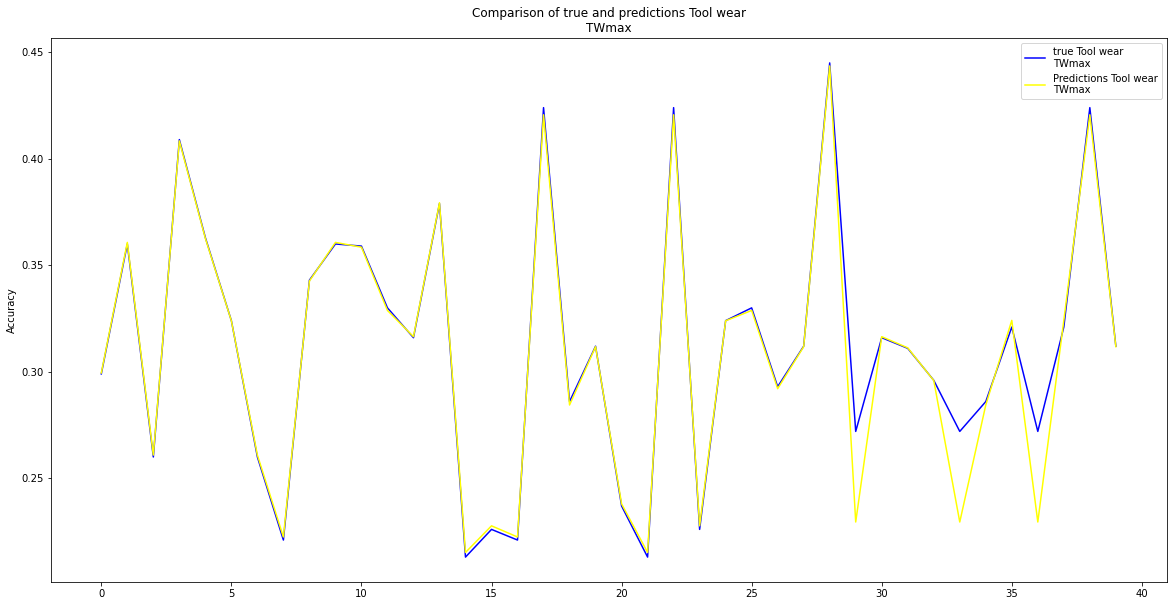

In [140]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(comparison['True Tool wear\nTWmax'].values,color='blue',label='true Tool wear\nTWmax')
plt.plot(comparison['Predicted Tool wear\nTWmax'].values,color='yellow',label='Predictions Tool wear\nTWmax')

plt.title('Comparison of true and predictions Tool wear\nTWmax')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [141]:
comparison.to_csv(r'XGB.csv', index = False, header=True)

In [16]:
confusion_matrix(y_test, pred)

ValueError: continuous is not supported